# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.79M/6.79M [00:01<00:00, 5.39MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')
print(rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
marsweather_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract table data
    td_contents = row.find_all('td')
    # Extract text contained within table data
    data = [content.text for content in td_contents]
    # Append the text to the list
    marsweather_list.append(data)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
marsweather_df = pd.DataFrame(marsweather_list, columns=columns)

In [10]:
# Confirm DataFrame was created successfully
marsweather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
marsweather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
marsweather_df['id']=marsweather_df['id'].astype(str)
marsweather_df['terrestrial_date']=pd.to_datetime(marsweather_df['terrestrial_date'])
marsweather_df['sol']=marsweather_df['sol'].astype(int)
marsweather_df['ls']=marsweather_df['ls'].astype(int)
marsweather_df['month']=marsweather_df['month'].astype(int)
marsweather_df['min_temp']=marsweather_df['min_temp'].astype(float)
marsweather_df['pressure']=marsweather_df['pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
marsweather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
months = marsweather_df['month'].nunique()
print(f"There are", months, "months on the red planet of Mars. ")

There are 12 months on the red planet of Mars. 


In [17]:
# 2. How many Martian days' worth of data are there?
# Refer to Column 'sol': the number of elapsed sols (Martian days) since Curiosity landed on Mars

sol_count = marsweather_df['sol'].nunique()
sol_count

1867

In [18]:
# 3. What is the average low temperature by month?
# Use groupby to group the data by the 'month' column
grp_month = marsweather_df.groupby('month')

# Calculate the mean of the 'min_temp' column for the groups
avg_mintemp_byMonth = grp_month['min_temp'].mean()

# Print result to obtain average low temperature by month
print(avg_mintemp_byMonth)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [19]:
avg_mintemp_byMonth_df = pd.DataFrame(avg_mintemp_byMonth)
avg_mintemp_byMonth_df.head()

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725


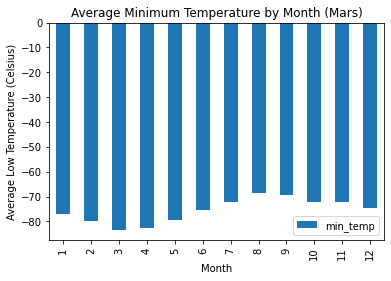

In [23]:
# Plot the average low temperature by month
avg_mintemp_byMonth_df.plot(kind='bar')

# Labels for x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')

# Add title and save
plt.title('Average Minimum Temperature by Month (Mars)')
plt.savefig('avgMinTemp_byMonth_Mars.png')
plt.show()

In [27]:
# Coldest temp on Mars

coldestTEMP = avg_mintemp_byMonth_df['min_temp'].min()
coldestTEMP

-83.30729166666667

In [28]:
# Warmest temp on Mars

warmestTEMP = avg_mintemp_byMonth_df['min_temp'].max()
warmestTEMP

-68.38297872340425

In [31]:
# Identify the coldest and hottest months in Curiosity's location

coldest_month = avg_mintemp_byMonth_df.loc[avg_mintemp_byMonth_df['min_temp']==coldestTEMP]
hottest_month = avg_mintemp_byMonth_df.loc[avg_mintemp_byMonth_df['min_temp']==warmestTEMP]

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)

Coldest month:         min_temp
month           
3     -83.307292
Hottest month:         min_temp
month           
8     -68.382979


In [32]:
# 4. Average pressure by Martian month
# Using groupby 'month'

avg_pressure_byMonth = grp_month['pressure'].mean()

print(avg_pressure_byMonth)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


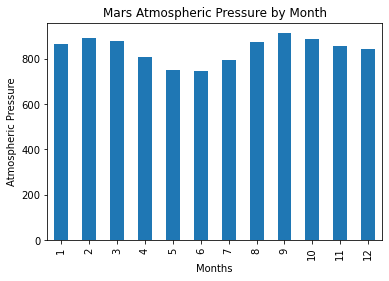

In [33]:
# Plot the average pressure by month
avg_pressure_byMonth.plot(kind='bar')

plt.title("Mars Atmospheric Pressure by Month")

plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")

plt.savefig('pressure_byMonth_mars.png')
plt.show()

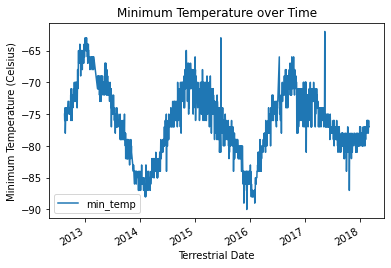

In [35]:
# 5. How many terrestrial (earth) days are there in a Martian year?
marsweather_df.plot(x='terrestrial_date', y='min_temp')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Minimum Temperature over Time')
plt.savefig('mintempXearthdays_mars.png')
plt.show()

# Analysis of Mars Weather Data

There are a total of 12 months on Mars. The current data set collated weather information for 1867 Martian days.

On average the coldest and hottest months on Mars are Month 3 and Month 8 respectively. Given that the average temperature on the warmest month was -68.38 degrees celsius, it would still be extremely cold for humans.

Atmospheric pressure is, on average, the lowest in Month 6 and the highest in Month 9.

In the two instances where temperatures went from peak to peak, the approximate terrestrial days it took to reach those levels were 730 (2013-2015) and 608 (from start 2015 to 2/3 into 2016) terresterial days. Taking an average a both, it can be assumed that a year on Mars is about 669 days. Please take this observation with a grain of salt as it was derived solely from examining the plot.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [36]:
# Write the data to a CSV
marsweather_df.to_csv('marsweather.csv', index=False)

In [37]:
browser.quit()